To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/install.html) and execute: `ploomber examples -n templates/ml-basic`

To start a free, hosted JupyterLab: [![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Ftemplates/ml-basic%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=templates/ml-basic%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


# Basic ML project

<!-- start description -->
Download data, clean it, generate features and train a model.
<!-- end description -->

## Description

Let's take a look at the `pipeline.yaml`:

```yaml
# Content of pipeline.yaml
tasks:
    # tasks.get, features and join are python functions
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

    # fit.py is a script (that you can open as notebook in Jupyter)
  - source: fit.py
    name: fit
    product:
        # this output notebook is the model's evaluation report
        nb: output/nb.html
        model: output/model.pickle

    # optional config to hide the code in the output/nb.html report
    nbconvert_export_kwargs:
      exclude_input: True
```

Note that the first three tasks as Python functions, while the last one is a
script.

Generate the plot:

In [1]:
%%bash
ploomber plot

Loading pipeline...
There's a new Ploomber version available (0.16.4), you're running 0.16.5dev. To upgrade: pip install ploomber --upgrade
Plot saved at: pipeline.png


/Users/Edu/miniconda3/envs/projects/lib/python3.9/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem
100%|██████████| 4/4 [00:00<00:00, 2840.71it/s]


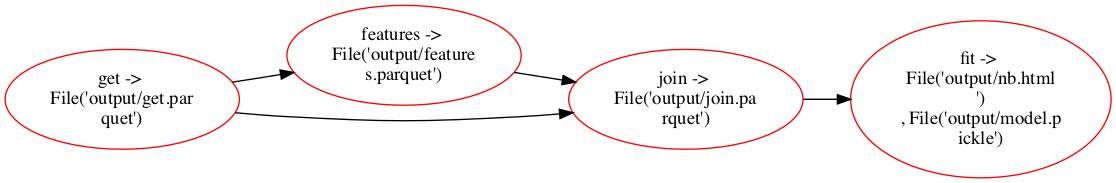

In [2]:
# If using jupyter, you can show the plot with this code:
from IPython.display import Image
Image(filename='pipeline.png')

# otherwise open the pipeline.png file directly

## Build pipeline

In [3]:
%%bash
ploomber build

Loading pipeline...
name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
get       True         0.014783      0.190055
features  True         0.249004      3.20127
join      True         0.027547      0.354153
fit       True         7.48694      96.2545


/Users/Edu/miniconda3/envs/projects/lib/python3.9/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem
/Users/Edu/dev/ploomber/src/ploomber/cli/build.py:62: UserWarning: b'Error: Non cloud users can monitor up to 2 pipelines simultaneously'
  warnings.warn(res)
Building task 'get':   0%|          | 0/4 [00:00<?, ?it/s]/Users/Edu/miniconda3/envs/projects/lib/python3.9/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem
Building task 'features':  25%|██▌       | 1/4 [00:03<00:10,  3.37s/it]/Users/Edu/miniconda3/envs/projects/lib/python3.9/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFil

Since Ploomber executes scripts as notebooks by default, `fit.py` will
generate a model report at [output/nb.ipynb](output/nb.ipynb) with evaluation
charts.

## Interacting with the pipeline

The command-line interface is a convenient way to interact with your
pipeline. Try this in a terminal:

~~~bash
ploomber interact
~~~